In [5]:
from google.colab import drive
drive.mount('/content/drive')

## Create a folder for the this HW and change to that dir
%ls
# %cd drive/MyDrive/cse519

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
genres.csv  LICENSE     mksqlite.mexw64       NameNormalizer/  Tasks_Demos/
genres.tsv  MatlabSrc/  msd_tagtraum_cd1.cls  PythonSrc/       test.m


In [6]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
# %cd MyDrive/dsf-project
%cd PythonSrc/

/content/drive/MyDrive/dsf-project/PythonSrc


In [14]:
%cd ../

/content/drive/MyDrive/dsf-project


In [11]:
%pip install python-dotenv
%pip install requests

In [12]:
import os
import sys
import h5py
import hdf5_getters, utils
import sqlite3
import pandas as pd
import numpy as np
import tarfile
import io
from dotenv import load_dotenv
import os
import json
from requests import post,get
import base64

In [13]:
sys.path.append(os.getcwd())

In [35]:
genres = pd.read_csv('genres.tsv', sep='\t', header=0, names=list(range(2)))
genres.head()
# df = pd.read_table('genres.tsv')
# df = pd.read_csv('genres.csv', header=None, sep='\t')

,0,1
TRAAAAK128F9318786,Pop_Rock,NaN
TRAAAAW128F429D538,Rap,NaN
TRAAABD128F429CF47,Pop_Rock,NaN
TRAAAED128E0783FAB,Jazz,Vocal
TRAAAEF128F4273421,Pop_Rock,NaN


In [49]:
%cd ../

/content/drive/MyDrive/dsf-project/PythonSrc


In [ ]:
column_values = "analysis_sample_rate, artist_7digitalid, artist_familiarity, artist_hotttnesss, artist_id, artist_latitude, artist_location, artist_longitude, artist_mbid, artist_mbtags, artist_mbtags_count, artist_name, artist_playmeid, artist_terms, artist_terms_freq, artist_terms_weight, audio_md5, bars_confidence, bars_start, beats_confidence, beats_start, danceability, duration, end_of_fade_in, energy, key, key_confidence, loudness, mode, mode_confidence, release, release_7digitalid, sections_confidence, sections_start, segments_confidence, segments_loudness_max, segments_loudness_max_time, segments_loudness_max_start, segments_pitches, segments_start, segments_timbre, similar_artists, song_hotttnesss, song_id, start_of_fade_out, tatums_confidence, tatums_start, tempo, time_signature_confidence, title, track_id, track_7digitalid, year"

table_name = "master"

create_table_query = "CREATE TABLE {0}({1})".format(table_name, column_values)

drop_table_query = "DROP TABLE {0};".format(table_name)

insert_table_query = "INSERT INTO master (analysis_sample_rate, artist_7digitalid, artist_familiarity, artist_hotttnesss, artist_id, artist_latitude, artist_location, artist_longitude, artist_mbid, artist_mbtags, artist_mbtags_count, artist_name, artist_playmeid, artist_terms, artist_terms_freq, artist_terms_weight, audio_md5, bars_confidence, bars_start, beats_confidence, beats_start, danceability, duration, end_of_fade_in, energy, key, key_confidence, loudness, mode, mode_confidence, release, release_7digitalid, sections_confidence, sections_start, segments_confidence, segments_loudness_max, segments_loudness_max_time, segments_loudness_max_start, segments_pitches, segments_start, segments_timbre, similar_artists, song_hotttnesss, song_id, start_of_fade_out, tatums_confidence, tatums_start, tempo, time_signature_confidence, title, track_id, track_7digitalid, year) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"

connection = sqlite3.connect('msd_db')
cursor = connection.cursor()
# cursor.execute(drop_table_query)
cursor.execute(create_table_query)
print(os.getcwd() + '/MillionSongSubset')
allfiles = utils.get_all_files(os.getcwd() + '/MillionSongSubset')

for file in allfiles:
    h5 = hdf5_getters.open_h5_file_read(file)
    analysis_sample_rate = hdf5_getters.get_analysis_sample_rate(h5)
    artist_7digitalid = hdf5_getters.get_artist_7digitalid(h5)
    artist_familiarity = hdf5_getters.get_artist_familiarity(h5)
    artist_hotttnesss = hdf5_getters.get_artist_hotttnesss(h5)
    artist_id = hdf5_getters.get_artist_id(h5)
    artist_latitude	= hdf5_getters.get_artist_latitude(h5)
    artist_location	= hdf5_getters.get_artist_location(h5)
    artist_longitude = hdf5_getters.get_artist_longitude(h5)
    artist_mbid	= hdf5_getters.get_artist_mbid(h5)
    artist_mbtags = hdf5_getters.get_artist_mbtags(h5)
    artist_mbtags_count = hdf5_getters.get_artist_mbtags_count(h5)
    artist_name = hdf5_getters.get_artist_name(h5)
    artist_playmeid	= hdf5_getters.get_artist_playmeid(h5)
    artist_terms = hdf5_getters.get_artist_terms(h5)
    artist_terms_freq = hdf5_getters.get_artist_terms_freq(h5)
    artist_terms_weight = hdf5_getters.get_artist_terms_weight(h5)
    audio_md5 = hdf5_getters.get_audio_md5(h5)
    bars_confidence = hdf5_getters.get_bars_confidence(h5)
    bars_start = hdf5_getters.get_bars_start(h5)
    beats_confidence = hdf5_getters.get_beats_confidence(h5)
    beats_start = hdf5_getters.get_beats_start(h5)
    danceability = hdf5_getters.get_danceability(h5)
    duration = hdf5_getters.get_duration(h5)
    end_of_fade_in = hdf5_getters.get_end_of_fade_in(h5)
    energy = hdf5_getters.get_energy(h5)
    key = hdf5_getters.get_key(h5)
    key_confidence = hdf5_getters.get_key_confidence(h5)
    loudness = hdf5_getters.get_loudness(h5)
    mode = hdf5_getters.get_mode(h5)
    mode_confidence	= hdf5_getters.get_mode_confidence(h5)
    release	= hdf5_getters.get_release(h5)
    release_7digitalid = hdf5_getters.get_release_7digitalid(h5)
    sections_confidence = hdf5_getters.get_sections_confidence(h5)
    sections_start = hdf5_getters.get_sections_start(h5)
    segments_confidence	= hdf5_getters.get_segments_confidence(h5)
    segments_loudness_max = hdf5_getters.get_segments_loudness_max(h5)
    segments_loudness_max_time = hdf5_getters.get_segments_loudness_max_time(h5)
    segments_loudness_max_start = hdf5_getters.get_segments_loudness_start(h5)
    segments_pitches = hdf5_getters.get_segments_pitches(h5)
    segments_start = hdf5_getters.get_segments_start(h5)
    segments_timbre = hdf5_getters.get_segments_timbre(h5)
    similar_artists = hdf5_getters.get_similar_artists(h5)
    song_hotttnesss = hdf5_getters.get_song_hotttnesss(h5)
    song_id = hdf5_getters.get_song_id(h5)
    start_of_fade_out = hdf5_getters.get_start_of_fade_out(h5)
    tatums_confidence = hdf5_getters.get_tatums_confidence(h5)
    tatums_start = hdf5_getters.get_tatums_start(h5)
    tempo = hdf5_getters.get_tempo(h5)
    time_signature = hdf5_getters.get_time_signature(h5)
    time_signature_confidence = hdf5_getters.get_time_signature_confidence(h5)
    title = hdf5_getters.get_title(h5)
    track_id = hdf5_getters.get_track_id(h5)
    track_7digitalid = hdf5_getters.get_track_7digitalid(h5)
    year = hdf5_getters.get_year(h5)

    h5.close()

    values = (analysis_sample_rate, artist_7digitalid, artist_familiarity, artist_hotttnesss, artist_id, artist_latitude, artist_location, artist_longitude, artist_mbid, artist_mbtags, artist_mbtags_count, artist_name, artist_playmeid, artist_terms, artist_terms_freq, artist_terms_weight, audio_md5, bars_confidence, bars_start, beats_confidence, beats_start, danceability, duration, end_of_fade_in, energy, key, key_confidence, loudness, mode, mode_confidence, release, release_7digitalid, sections_confidence, sections_start, segments_confidence, segments_loudness_max, segments_loudness_max_time, segments_loudness_max_start, segments_pitches, segments_start, segments_timbre, similar_artists, song_hotttnesss, song_id, start_of_fade_out, tatums_confidence, tatums_start, tempo, time_signature_confidence, title, track_id, track_7digitalid, year)

    cursor.execute(insert_table_query, values)



/content/drive/MyDrive/dsf-project/PythonSrc/MillionSongSubset


In [42]:
connection.commit()

In [43]:
connection.close()

In [44]:
connection = sqlite3.connect('msd_db')


In [45]:
r = pd.read_sql('select * from master', connection)

In [46]:
r.head()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,song_id,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature_confidence,title,track_id,track_7digitalid,year


In [ ]:
print(r.iloc[0])

analysis_sample_rate                                               b'"V\x00\x00'
artist_7digitalid                                            b'\x96\x85\x02\x00'
artist_familiarity                                                      0.581794
artist_hotttnesss                                                       0.401998
artist_id                                                  b'ARD7TVE1187B99BFB1'
artist_latitude                                                              NaN
artist_location                                               b'California - LA'
artist_longitude                                                             NaN
artist_mbid                              b'e77e51a5-4761-45b3-9847-2051f811e366'
artist_mbtags                                                                b''
artist_mbtags_count                                                          b''
artist_name                                                            b'Casual'
artist_playmeid             

In [ ]:
result = pd.DataFrame({
        'isNull': r.isna().any(),
        'isUnique': r.nunique() == len(r),
        'cardinality': r.nunique(),
        'nullPct': round((r.isnull().sum() / len(r)) * 100, 2),
        'firstRow': r.iloc[0],
        'randomRrow': r.iloc[np.random.randint(low=0, high=len(r))],
        'lastRow': r.iloc[-1],
        'dtype': r.dtypes,
        'max':r.max(),
        'min':r.min()
        })
print(result)


                             isNull  isUnique  cardinality  nullPct  \
analysis_sample_rate          False     False            1     0.00   
artist_7digitalid             False     False         3867     0.00   
artist_familiarity             True     False         4047     0.04   
artist_hotttnesss             False     False         3714     0.00   
artist_id                     False     False         3888     0.00   
artist_latitude                True     False          622    62.58   
artist_location               False     False         1046     0.00   
artist_longitude               True     False          623    62.58   
artist_mbid                   False     False         3489     0.00   
artist_mbtags                 False     False          693     0.00   
artist_mbtags_count           False     False          111     0.00   
artist_name                   False     False         4412     0.00   
artist_playmeid               False     False         1915     0.00   
artist

In [ ]:
# def to_str(item):
#     # for each in keys:

#     a=  str(item).split('\\')[0].split('b\'')[-1]
#     if a == '\'':
#         return None
#     else:
#         return a

# r['new_artist_tags'] = r['artist_mbtags'].apply(to_str)
# r['artist_mbtags'][9996].split('\\')[0].split('b\'')[-1]
# str(r['artist_mbtags'][9996]).split('\\')
# str(r['artist_mbtags'].unique()).split('\\')[0].split('b\'')[-1]
# r['artist_mbtags'].unique()[0].decode('utf-8')

In [ ]:
# r['new_artist_tags'].describe()

count                     3710
unique                     275
top       classic pop and rock
freq                       254
Name: new_artist_tags, dtype: object

In [ ]:
# def to_s(item):
#     a = str(item).split('b\'')[1][:-1]
#     return a

# # str(r['track_id'][0]).split('b\'')
# r['track_id_str'] = r['track_id'].apply(to_s)
# r['track_id_str']
# r.loc[r['track_id_str'] == b'TRADGXV128F932C444']

In [ ]:
# other_ids = ['TRADGCZ128F92DE9B9','TRADGJI128F425A744','TRADGKR12903CDDB34','TRADGMK128F149DAB7','TRADGXI128F92EF28F','TRADGXV128F932C444','TRADHCI128F42793C4','TRADHCN128F428FA36','TRADHKH128F931694F','TRADHLA128F1492706','TRADHLI128F428FEFD','TRADHQA128F42441B7','TRADHRK128F4268B78','TRADHXG128F9353239','TRADICZ128F422C373','TRADIDC128F4275D86','TRADIEO128F4299DE7','TRADIFK128F92D35D3','TRADIFS128F92F5AD3','TRADIJB128E078A9B7','TRADIKQ128F42B1DFE','TRADIMW128F424CD4B','TRADIMY12903D05325','TRADJBK128F1453605','TRADJBU128F42951F1','TRADJBZ128F1491A61','TRADJGZ128F930C795','TRADJJD128F423722C','TRADJJZ128F9341B4']

# count = 0
# for i in other_ids:
#     a = r.loc[r['track_id_str'] == i]
#     if not a.empty:
#         count += 1


In [ ]:
gg = pd.read_csv('C:\\Users\\mkhamkar\\Desktop\\dsf-project-master\\genres.tsv')
for index,row in gg.iterrows():

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
gg2 = pd.read_csv('C:\\Users\\mkhamkar\\Desktop\\dsf-project-master\\genres.tsv',sep='\t')
df_genres = gg2.iloc[:, 1:].apply(lambda x: x.str.split('\t').explode())

df_pivot = df_genres.pivot_table(index=gg2.index.repeat(df_genres.count(axis=1)), columns=df_genres.groupby(level=0).cumcount())

df_pivot.columns = ['genre' + str(i + 1) for i in df_pivot.columns.get_level_values(1)]
df_final = gg2.join(df_pivot).drop(['genre1', 'genre2'], axis=1)

print(df_final)

ParserError: Error tokenizing data. C error: Expected 2 fields in line 5, saw 3


In [ ]:
file_path = 'jam_to_msd.tsv'
data = pd.read_csv(file_path, sep='\t')
data.sample(10)

,dac2a597261068d62d9d397c697bf96c,TRUTYZK128F42482B5
192785,1699631bdc326e4364eb08a7bac5cd2b,TRHTDCM128F425ACB2
59722,9e6e2d03279360b9e003f254d3e79ee6,TRGKOVQ128F92E742A
134709,bc4ba75ca87d1e9cb0a7289cb3501370,TRCUDYA128F422EFF2
422180,b1c84844fcd766ae42b7fb5a5eed3246,TRTISVG128F429E748
341622,88f27f0549da514e97f7d96550e9e744,TROFYPX128F933B30E
690764,1c147bbc0555bfb3e698b07783303a6f,TRWUTIK128F425D40E
47526,fd5c9f46c322281681220c52afa81411,TRCDHYK128F92FD274
292561,5e9b2aeca02fe07fc56b85a1218b5c7a,TRAAPSQ12903CAE86A
888925,4df6ded2625a503d00ae2913bace34b8,TRDMHXV128F4259D1D
933957,6e0f7625fccfa4f242cf0b5705e7173f,TRJANQN128F146A3FC


In [ ]:
load_dotenv()
clientId = os.getenv("CLIENT-ID")
clientSecret = os.getenv("CLIENT-SECRET")

In [ ]:
def get_token():
    auth_string=clientId + ":" + clientSecret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode (auth_bytes), "utf-8")
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth_base64,
    "Content-Type": "application/x-www-form-urlencoded"
    }
    data={
        "grant_type": "client_credentials"
    }
    result = post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

def get_auth_header(token):
    return {"Authorization":"Bearer "+token}

def search_for_artist(token,artist_name):
    url="https://api.spotify.com/v1/search"
    headers=get_auth_header(token)
    query=f"?q={artist_name}&type=artist&limit=1"
    query_url=url+query
    result=get(query_url,headers=headers)
    json_result = json.loads(result.content)["artists"]["items"]
    if len(json_result)==0:
        print("no artist with this name exists...")
        return None

    return json_result[0]


def get_songs_by_artists(token,artist_id):
    url=f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks?country=US"
    headers = get_auth_header(token)
    result = get(url, headers=headers)
    json_result = json.loads(result.content) ["tracks"]
    return json_result

def get_genres(token):
    url='https://api.spotify.com/v1/recommendations/available-genre-seeds'
    headers=get_auth_header(token)
    result=get(url,headers=headers)
    json_result=json.loads(result.content)
    print(json_result)

token =get_token()
res=search_for_artist(token, "ACDC")
artist_id = res["id"]
songs = get_songs_by_artists(token, artist_id)
for idx, song in enumerate (songs):
    print(f"{idx + 1}. {song['name']}")
print(res)

1. Highway to Hell
2. Thunderstruck
3. Back In Black
4. You Shook Me All Night Long
5. T.N.T.
6. Hells Bells
7. Dirty Deeds Done Dirt Cheap
8. Shoot to Thrill
9. It's a Long Way to the Top (If You Wanna Rock 'N' Roll)
10. Rock N Roll Train
{'external_urls': {'spotify': 'https://open.spotify.com/artist/711MCceyCBcFnzjGY4Q7Un'}, 'followers': {'href': None, 'total': 27604107}, 'genres': ['australian rock', 'hard rock', 'rock'], 'href': 'https://api.spotify.com/v1/artists/711MCceyCBcFnzjGY4Q7Un', 'id': '711MCceyCBcFnzjGY4Q7Un', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebc4c77549095c86acb4e77b37', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174c4c77549095c86acb4e77b37', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178c4c77549095c86acb4e77b37', 'width': 160}], 'name': 'AC/DC', 'popularity': 78, 'type': 'artist', 'uri': 'spotify:artist:711MCceyCBcFnzjGY4Q7Un'}


In [ ]:

def get_genres(token):
    url='https://api.spotify.com/v1/recommendations/available-genre-seeds'
    headers=get_auth_header(token)
    result=get(url,headers=headers)
    json_result=json.loads(result.content)
    print(json_result)

token =get_token()
get_genres(token)

{'genres': ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep'

In [ ]:
file_path = 'acousticbrainz-mediaeval-train-01-005.tar.bz2'

with tarfile.open(file_path, 'r:bz2') as tar:
    file_name = 'file_name.csv'
    file = tar.extractfile(file_name)
    df = pd.read_csv(io.StringIO(file.read().decode('utf-8')))
    print(df.head())


In [ ]:
file_path = 'acousticbrainz-mediaeval-train-01-005.tar.bz2'

with tarfile.open(file_path, 'r:bz2') as tar:
    tar.extractall()

with tarfile.open(file_path, 'r:bz2') as tar:
    file_names = tar.getnames()

print("Files in the .tar.bz2 file:")
for name in file_names:
    print(name)

In [ ]:
numeric_columns = ['artist_hotttnesss', 'artist_familiarity', 'key_confidence','loudness','song_hotttnesss','tempo','time_signature_confidence']
# columns_to_convert = ['artist_name', 'col2', 'col3']
# r[columns_to_convert] = r[columns_to_convert].astype(str)

avg_attributes_per_artist=r
avg_attributes_per_artist['artist_name_str'] = avg_attributes_per_artist['artist_name'].str.decode('utf-8')
unique_values = avg_attributes_per_artist['artist_name_str'].unique()
for p in unique_values:
    print(p)


Casual
The Box Tops
Sonora Santanera
Adam Ant
Gob
Jeff And Sheri Easter
Rated R
Tweeterfriendly Music
Planet P Project
Clp
JennyAnyKind
Wayne Watson
Andy Andy
Bob Azzam
Lionel Richie
Blue Rodeo
Richard Souther
Faiz Ali Faiz
Tesla
lextrical
Jimmy Wakely
Alice Stuart
Elena
The Dillinger Escape Plan
SUE THOMPSON
Five Bolt Main
Tim Wilson
Willie Bobo
Faye Adams
Terry Callier
John Wesley
The Shangri-Las
Billie Jo Spears
Mike Jones (Featuring CJ_ Mello & Lil' Bran)
Sierra Maestra
Butthole Surfers
Despina Vandi
Javier Navarrete
Jacob Young
Scarlet's Remains
The Suicide Machines
The Rolling Stones
Roberto Torres
Loudon Wainwright III
R.L. Burnside
Stevie Ray Vaughan
John Hammond
Casiotone For The Painfully Alone
Ec8or
The New York Dolls
Eliane Elias
Lost Boyz
The Germs
Yamandu Costa
Chris Rea
Perrey And Kingsley
Eurythmics
Francis Dunnery
John Cale
Suzanne Ciani
Vickie Winans
The Berzerker
Kings Of Leon
Edith Lefel
Taras
NOFX
Murskahumppa
Soda Stereo
Bruce Rowland
Xcultures
White Heart
Heavy D

In [ ]:
avg_attributes_per_artist = avg_attributes_per_artist.groupby('artist_name_str')[numeric_columns].mean()
sorted_df = avg_attributes_per_artist.sort_values(by='artist_hotttnesss', ascending=False)
sorted_df.head(10)

,artist_hotttnesss,artist_familiarity,key_confidence,loudness,song_hotttnesss,tempo,time_signature_confidence
artist_name_str,,,,,,,
Kanye West / Lupe Fiasco,1.082503,0.877214,0.000000,-5.263000,NaN,106.825000,1.000000
Kanye West / Consequence / Cam'Ron,1.082503,0.877214,0.693000,-6.029000,NaN,114.390000,1.000000
Kanye West / Adam Levine,1.082503,0.877214,0.000000,-11.380000,NaN,95.098000,1.000000
Kanye West,1.082503,0.877214,0.428833,-9.852667,0.797318,115.879000,0.388500
Daft Punk,1.021256,0.902841,0.055000,-5.019000,0.862255,111.201000,1.000000
Black Eyed Peas / Terry Dexter,1.005942,0.845602,0.094000,-3.574000,0.508602,103.652000,0.996000
Black Eyed Peas / Les Nubians / Mos Def,1.005942,0.845602,0.748000,-6.618000,NaN,94.993000,0.684000
Black Eyed Peas,1.005942,0.845602,0.408667,-5.295333,0.624425,138.903000,0.835000
Coldplay,0.916053,0.865022,0.461000,-7.051667,0.660602,131.854000,0.557833


<Figure size 2000x1200 with 0 Axes>

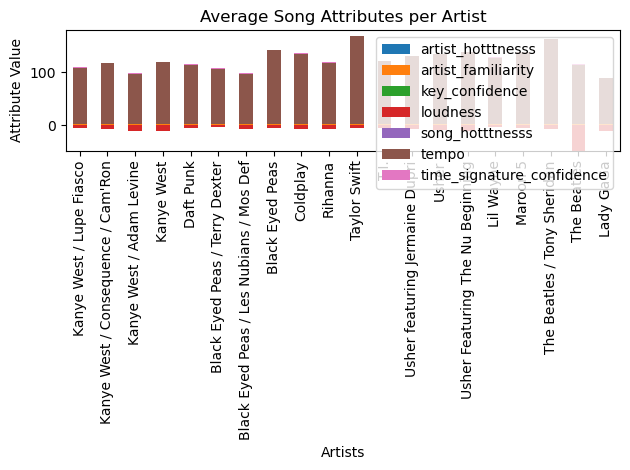

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plot1=sorted_df.head(20)
plot1.plot(kind='bar', stacked=True)
plt.title('Average Song Attributes per Artist')
plt.xlabel('Artists')
plt.ylabel('Attribute Value')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


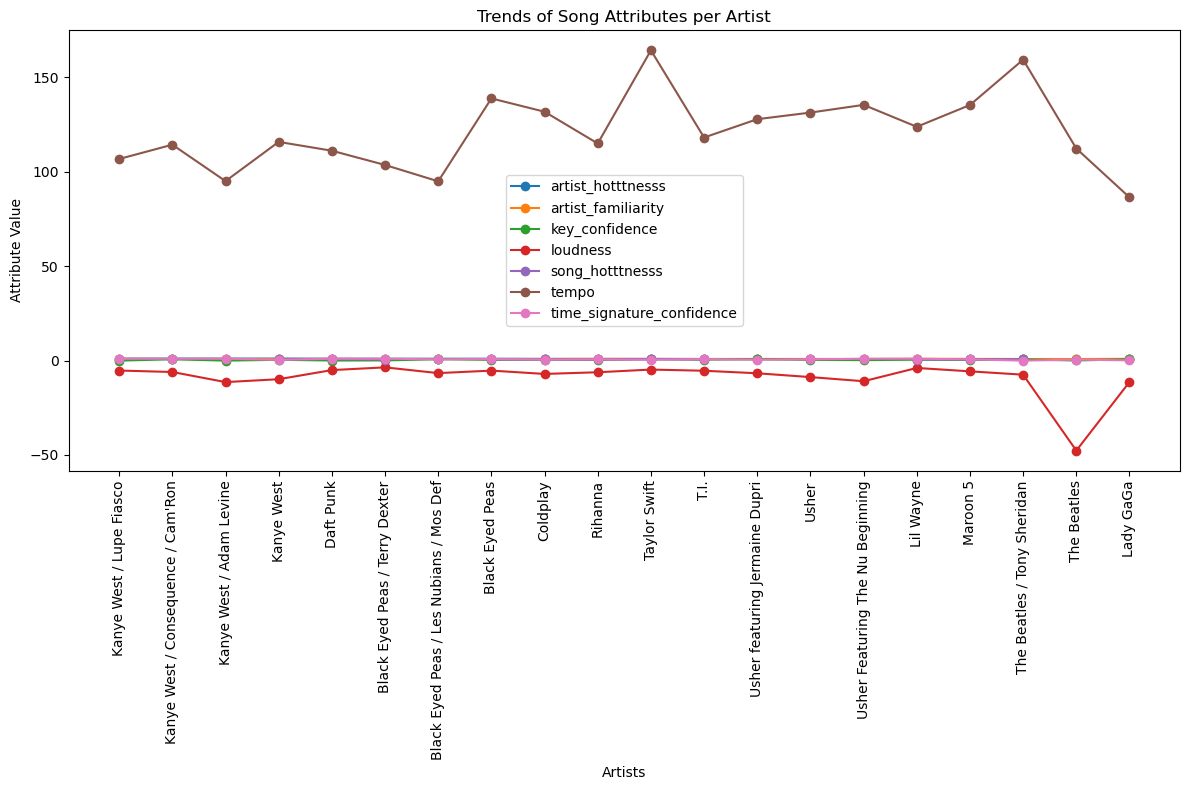

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for col in plot1.columns:
    plt.plot(plot1.index, plot1[col], marker='o', label=col)

plt.title('Trends of Song Attributes per Artist')
plt.xlabel('Artists')
plt.ylabel('Attribute Value')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
sorted_df_asc = avg_attributes_per_artist.sort_values(by='artist_hotttnesss', ascending=True)
sorted_df_asc.head(10)

,artist_hotttnesss,artist_familiarity,key_confidence,loudness,song_hotttnesss,tempo,time_signature_confidence
artist_name_str,,,,,,,
Dan Moretti,0.0,0.411746,0.252000,-10.474000,NaN,84.791000,0.739000
Cantara,0.0,0.038868,0.775000,-9.134000,NaN,139.963000,0.302000
El Tiempo,0.0,0.583828,0.049000,-7.890500,NaN,144.522000,0.491500
Michèle Crider;Eleonora Jankovic;Vincenzo La Scola;Riccardo Muti,0.0,0.229264,0.843000,-36.577000,NaN,39.187000,0.000000
Asure,0.0,0.327574,0.451000,-1.026000,NaN,99.886000,0.821000
Michèle Crider;Vincenzo La Scola;Samuel Ramey;Riccardo Muti,0.0,0.229264,0.433000,-24.009000,NaN,85.184000,0.515000
Rainforest Trio,0.0,0.022557,0.305000,-16.246000,0.000000,107.965000,0.900000
Rainer Bielfeldt,0.0,0.407448,0.678333,-10.085333,0.000000,136.413333,0.436667
El Gran Combo De Puerto Rico,0.0,0.597532,0.355000,-7.537000,0.534655,192.417000,0.797000


In [ ]:
sorted_by_year = r.sort_values(by='year', ascending=True)
sorted_by_year['artist_name_str'] = sorted_by_year['artist_name'].str.decode('utf-8')

In [ ]:
r['track_id']=r['track_id'].str.decode('utf-8')
print(r['track_id'])

0       TRAAAAW128F429D538
1       TRAAABD128F429CF47
2       TRAAADZ128F9348C2E
3       TRAAAEF128F4273421
4       TRAAAFD128F92F423A
               ...        
9995    TRBIJMU12903CF892B
9996    TRBIJNF128F14815A7
9997    TRBIJNK128F93093EC
9998    TRBIJRN128F425F3DD
9999    TRBIJYB128F14AE326
Name: track_id, Length: 10000, dtype: object


In [ ]:
index = r[r['track_id'] == 'TRAAABD128F429CF47'].index

if not index.empty:
    print(f"Value found at index: {index[0]}")
else:
    print("Value not found in the DataFrame")

Value found at index: 1
